# 3. 잘 만든 Augmentation, 이미지 100장 안 부럽다

딥러닝 모델을 학습 시키기 위해 대량의 데이터를 확보해야한다. 대표적인 이미지 데이터셋인 ImageNet은 약 1400만 장의 이미지를 갖고 있고, 분류 대상 클래스가 10개라 상대적으로 간단해보이는 CIFAR-10도 몇 만 장의 데이터를 갖고 있다.

데이터셋 외에 우리가 원하는 문제를 풀 때 이에 맞는 데이터가 추가로 필요하다. 이러한 데이터를 몇 만장씩 구축하는 데 많은 비용과 시간이 필요하다. 이때, 제한된 데이터셋을 최대한 활용하기 위해 augmentation이라는 방법을 사용할 수 있다.

# 3-2. 데이터셋의 현실

### 1) 대량의 데이터셋
이미지넷은 1,400만 장의 이미지를 보유하고 있고, CIFAR-10도 학습용 데이터셋은 5만 장이나 된다.

이런 규모의 데이터셋은 만드는 데 얼마나 큰 비용이 들까? 라벨 데이터를 포함해 장당 10원이라 하더라도 이미지넷과 같은 데이터셋을 구축하기 위해 1억이 넘는 비용이 발생한다. 물론 실제로는 이보다 훨씬 비싸다.

### 2) 직접 구축하는 데이터셋
사진을 보고 시내의 유명한 카페를 분류하는 모델을 만들어야하는 프로젝트가 생겼다. 

강남의 카페를 조사하기 위해 인스타그램을 크롤링해 20여 개의 카페 사진 약 2,500장을 얻을 수 있었다고 상상해보자. 처음 크롤링 할 때는 많았으나 내부 인테리어 사진으로 카페를 구분하기 위해 음식, 사람 사진을 제외하니 많은 수가 줄었다. 이렇게 직접 데이터를 수집하면 만 장 단위로 데이터셋을 모으기가 쉽지 않다.   
__수량의 문제도 있지만 고품질로 정제하는 과정도 어렵다.__

# 3-3. Data Augmentation이란? (1) 개요

이렇게 열심히 모은 데이터셋을 어떻게 최대한 활용할 수 있을까?

Data augmentation은 갖고 있는 데이터셋을 여러 가지 방법으로 증강(augment)시켜 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법이다.   
일반적으로 하드디스크에 저장된 이미지 데이터를 메모리에 로드한 후, 학습시킬 때 변형을 가하는 방법을 사용한다.

데이터가 많아진다는 것은 overfitting을 줄일 수 있다는 것을 의미한다. 우리가 갖고 있는 데이터셋이 실제 상황의 입력값과 다를 경우, augmentation을 통해 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수 있다.   
예를 들어, 우리가 학습한 데이터는 노이즈가 많이 없는 사진이지만, 테스트 이미지는 다양한 노이즈가 있는 경우가 있다. 테스트에서 좋은 성능을 내기 위해 노이즈의 분포를 예측하고 학습 데이터에 노이즈를 삽입해 모델이 이런 노이즈에 잘 대응할 수 있도록 해야한다.   
이렇게 data augmentation은 데이터를 늘릴 뿐만 아니라 모델이 실제 테스트 환경에서 잘 동작할 수 있도록 도와주기도 한다.

### 이미지 데이터 augmentation
이미지 데이터의 augmentation은 포토샵, SNS의 사진 필터, 각종 카메라 앱에서 흔히 발견할 수 있는 기능들과 비슷하다.   
쉬운 예로 모델이 다양한 색상의 사진을 학습하기 위해 우리가 인스타에 업로드할 때 쓰는 색상 필터들을 적용해볼 수 있다. 그리고 좌우 대칭이나, 상하 반전 같이 이미지의 공간적인 배치를 조작할 수도 있다.

# 3-4. Data Augmentation이란? (2) 다양한 Image Augamentation 방법

image augmentation 기법에 구체적으로 어떤것들이 있는지 살펴보자. [Tensorflow: Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) 텐서플로우 튜토리얼에 소개된 image augmentation 예제들로부터 시작해보자.

### Flipping
Flip은 이미지를 대칭하는 기능이다. 분류 문제에서는 문제가 없을 수 있지만 detection, segmentation 문제는 정확한 정답 영역이 존재하므로, 라벨도 같이 좌우 반전을 해주어야한다.   
숫자나 알파벳 문자를 recognition 하는 문제도 주의해야한다. 상하나 좌우가 반전되면 다른 글자가 될 가능성이 있다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/gc-2-l-flip.max-800x600.png)

### Gray scale
Gray scale은 3가지 channel을 가진 RGB 이미지를 하나의 채널을 갖도록 해준다. 아래 이미지 예제는 흑백 대신 다른 색상으로 이미지를 표현했다. RGB 각각의 채널마다 weight를 주어 weighted sum(가중합)을 했다. 사용된 가중치의 경우 합이 1이 됨을 알 수 있다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/gc-2-l-grayscale.max-800x600.png)

### Saturation
saturation은 RGB 이미지를 HSV(Hue(색조), Satureation(채도), Value(명도)) 이미지로 변경하고 saturation 채널에 offset을 적용하여 이미지를 조금 더 선명하게 만든 후 RGB색상 모델로 변경한다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/GC-2-L-5.max-800x600.png)

### Brightness
밝기를 조절할 수 있다. RGB에서 (255,255,255)는 흰색, (0,0,0)은 검은색을 의미한다. RGB 채널에서 값을 더해주면 밝아지고 빼주면 어두워지는 특징을 통해 brightness를 변경할 수 있다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/GC-2-L-6.max-800x600.png)

### Rotation
Rotation은 이미지의 각도를 변환한다. 90도의 경우 직사각형 형태가 유지되기 때문에 이미지의 크기만 조절해주면 바로 사용할 수 있다. 하지만 90도가 아닌 경우 나머지 채워지지 않는 빈 공간을 어떻게 처리할지 유의해야 한다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/GC-2-L-7.max-800x600.png)

### Center Crop
center crop은 이미지의 중앙을 기준으로 확대하는 방법이다. 너무 작게 center crop을 할 경우 볼래 가진 라벨과 맞지 않는 상황이 일어날 수 있으니 주의가 필요하다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/GC-2-L-8.max-800x600.png)

이 외에도 gaussian noise, contrast change, sharpen, affine transformation, padding, blurring 등이 있다.

---

# ❗️ 3-8. albumentations를 진행하면서 라이브러리 부분에 오류가 생겨 opencv를 업데이트하고 시작했다. ❗️

In [1]:
! pip list | grep opencv

opencv-contrib-python         4.1.2.30
opencv-python                 4.1.2.30


In [2]:
! python -m pip install --upgrade opencv-contrib-python opencv-python

     |████████████████████████████████| 66.7 MB 25 kB/s 
     |████████████████████████████████| 60.5 MB 65 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
! pip list | grep opencv

opencv-contrib-python         4.5.5.64
opencv-python                 4.5.5.64


---

# 3-5. 텐서플로우를 사용한 Image Augmenation (1) Flip

위에서 본 방법들을 코드로 사용해보자. 이미지를 PIL로 로드하고 텐서로 바꾼 뒤, 기법들을 하나씩 적용해보고 이를 다시 이미지로 화면에 표시하여 결과를 확인하자.

In [4]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = '/content/drive/MyDrive/aiffel_dataset/augmentation/mycat.jpeg'
sample_img_path

'/content/drive/MyDrive/aiffel_dataset/augmentation/mycat.jpeg'

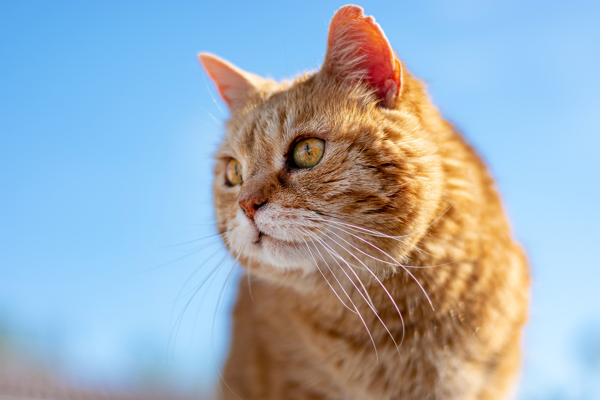

In [5]:
image = Image.open(sample_img_path).resize((600, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip
flip은 left, right와 up, down 두 가지로 좌우, 상하 반전으로 구분된다.

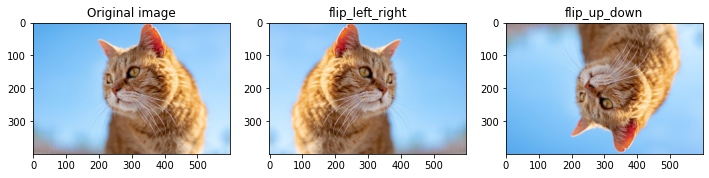

In [6]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

이렇게 적용한 flip을 확률에 따라서 적용되도록 바꿔야한다. 그래야 반전이 되지 않은 원본 데이터도 활용이 될 수 있기 떄문이다. 그래서 `random_flip_left_right`, `random_flip_up_down`을 활용하자. 이 둘을 합쳐 `random_flip`으로 만드는 방법도 있다.

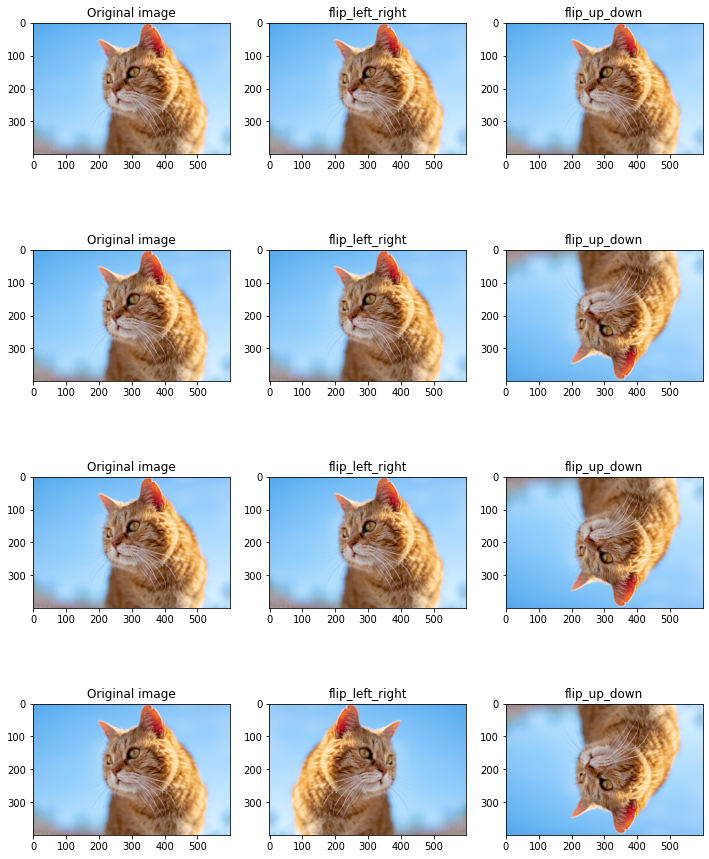

In [7]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

# 3-6. 텐서플로우를 사용한 Image Augmentation (2) Center Crop

center crop은 단순하게 중심점을 기준으로 확대하면 안된다. 얼마나 적용해야할지 주의해야한다. `central_fraction`은 얼마나 확대할지 조절하는 매개변수이다.   
1.0은 원본 이미지와 같다. 하지만 예시의 고양이 이미지는 0.5까지는 보일 수 있지만 0.25 수준으로 낮추면 털만 보이고 고양이의 형상을 찾기 어려울 수 있다. 그래서 문제가 생기지 않는 범위 내에서 랜덤하게 조절해야한다.

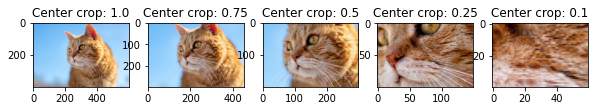

In [8]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

랜덤 `centeral_crop`을 적용하는 함수는 텐서플로우에서 기본적으로 제공하고 있지 않다. 그래서 파이썬의 `random` 모듈을 사용하거나 텐서플로우의 랜덤 모듈을 사용해야한다.

In [9]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

=3


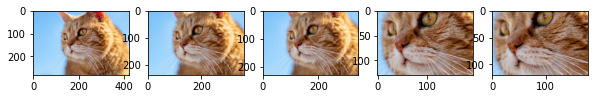

In [10]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

# 3-7. 텐서플로우를 사용한 Image Augmentation (3) 직접 해보기

`tf.image.random_crop()`, `tf.image.random_brightness()`를 사용해서 활용해보자.

### tf.image.random_crop()
[tf.image.random_crop](https://www.tensorflow.org/api_docs/python/tf/image/random_crop)

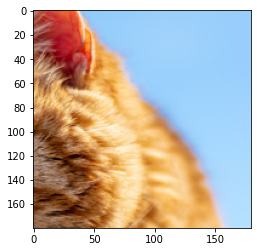

In [11]:
plt.figure(figsize=(5, 4))

random_crop_tensor = tf.image.random_crop(value=image_tensor, size=(180,180,3))
random_crop_img = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_img)

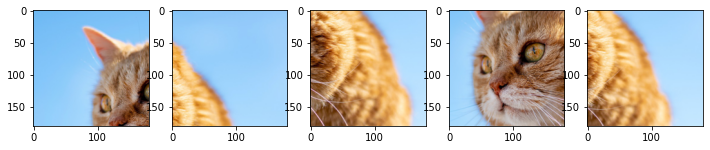

In [12]:
plt.figure(figsize=(12, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(value=image_tensor, size=(180,180,3))
    random_crop_img = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5,i+1)
    plt.imshow(random_crop_img)

### tf.image.random_brightness()
[tf.image.random_brightness()](https://www.tensorflow.org/api_docs/python/tf/image/random_brightness)

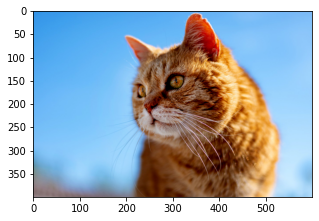

In [13]:
plt.figure(figsize=(5, 4))

random_brightness_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_brightness_tensor = tf.clip_by_value(random_brightness_tensor,0,255)
random_brightness_img = tf.keras.preprocessing.image.array_to_img(random_brightness_tensor)

plt.imshow(random_brightness_img)
plt.show()

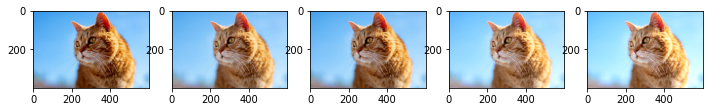

In [14]:
plt.figure(figsize=(12, 15))

for i in range(5):
    random_brightness_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_brightness_tensor = tf.clip_by_value(random_brightness_tensor,0,255)
    random_brightness_img = tf.keras.preprocessing.image.array_to_img(random_brightness_tensor)

    plt.subplot(1,5,i+1)
    plt.imshow(random_brightness_img)

# 3-8. albumentations 라이브러리

[albumentations 라이브러리](https://github.com/albumentations-team/albumentations)

텐서플로우에서 기본적으로 제공되는 augmentation 함수들을 확인해봤다. 이러한 augmentation들을 모아서 제공하는 전문 라이브러리들이 있는데, 그 중 Albummentations 라이브러리를 활용해보자. 이는 augmentation을 위한 python 라이브러리다. 

![](https://d3s0tskafalll9.cloudfront.net/media/images/image_m0uMi1l.max-800x600.png)

여기서 배열을 이미지의 기본 형태로 사용한다. 따라서 PIL Image 데이터형을 numpy 배열로 변환하여 사용해야한다.

In [15]:
import numpy as np
image = Image.open(sample_img_path).resize((400, 300)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_arr = np.array(image)
image_arr.shape

(300, 400, 3)

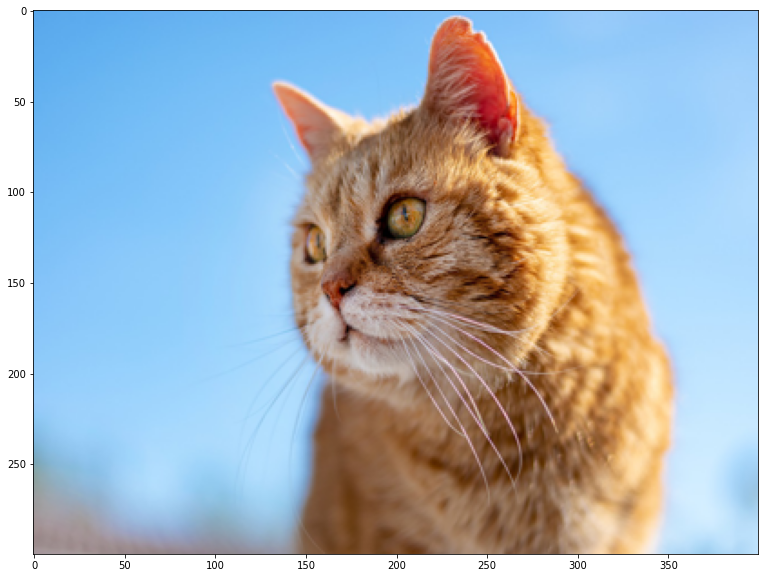

In [16]:
def visualize(image):
    plt.figure(figsize=(20, 10))
    plt.imshow(image)

visualize(image_arr)

### augmentation 기법 사용해보기
[transforms.Affine()](https://albumentations.ai/docs/api_reference/augmentations/geometric/transforms/#albumentations.augmentations.geometric.transforms.Affine)

아핀 변환을 이미지에 적용해보자. 2D 변환의 일종인 아핀 변환은 이미지의 스케일을 조절하거나, 평행이동, 회전 등의 변환을 줄 수 있다. 아래의 코드는 -45도와 45도 사이에 랜덤하게 각도를 변환하는 augmentation이다.

In [17]:
! pip list | grep albumentations # albumentations                0.1.12

albumentations                0.1.12


aiffle cloud는 albumentations 1.1.0 version을 갖고있어서 새로 설치했다.

In [18]:
! pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-rs2la1yb
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-rs2la1yb
     |████████████████████████████████| 47.8 MB 1.5 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=112723 sha256=bbf742cf356303a2825401a1193550a6a86d7e50c3c4c8bcb7b25c537d08632a
  Stored in directory: /tmp/pip-ephem-wheel-cache-l0h5_zhr/wheels/3a/25/ed/ec3b518e7a332d7f0a3bb37c280e1b784cf2f79b94b3c7d00b
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [19]:
! pip list | grep albumentations

albumentations                1.1.0


In [22]:
import albumentations as A

for i in range(10):
    transform = A.Compose([
        A.Affine(rotate=(-45, 45),scale=(0.5,0.9),p=0.5) 
    ])
    transformed = transform(image=image_arr)
    plt.figure(figsize=(12,12))
    plt.imshow((transformed['image']))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### ransforms.RandomCrop()
[ransforms.RandomCrop()](https://albumentations.ai/docs/api_reference/augmentations/crops/transforms/#albumentations.augmentations.crops.transforms.RandomCrop)

256x256 사이즈를 랜덤하게 10개정도 생성할 수 있다.

In [23]:
import random
for i in range(10):
    transform = A.Compose(
        [A.RandomCrop(width=256, height=256)]
    )
    transformed = transform(image=image_arr)
    visualize(transformed['image'])

Output hidden; open in https://colab.research.google.com to view.

### MedianBlur()
블러처리를 쉽게할 수 있다.

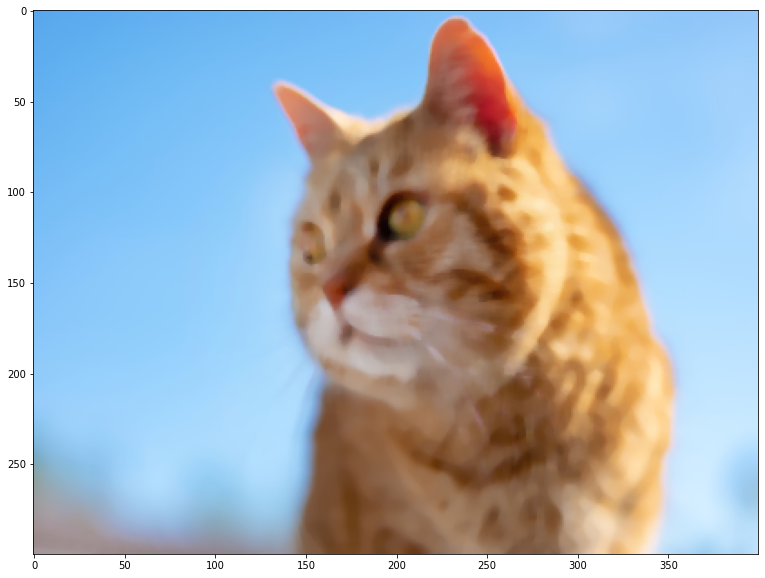

In [24]:
transform = A.Compose(
    [
    A.MedianBlur (blur_limit=7, always_apply=False, p=0.5)]
    
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

### ToGray(), MultiplicativeNoise()
augmenation 기법들을 한 번에 조합하여 사용할 수 있다.

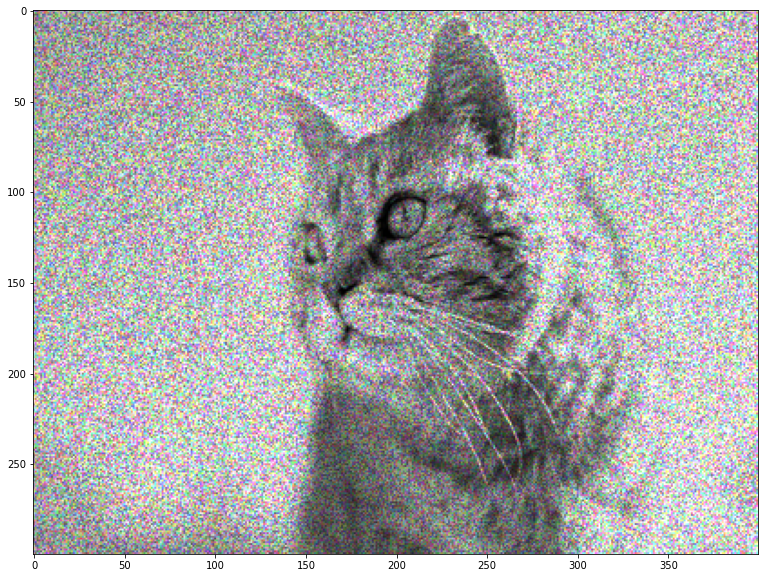

In [25]:
transform = A.Compose(
    [A.ToGray(p=1),
    A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)]
    
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

ToGray(), MultiplicativeNoise(), RandomCrop()을 같이 사용해서 100장의 이미지를 만들어보자.

In [26]:
def transform_data(img_arr):
    transform = A.Compose([
        A.ToGray(p=1),
        A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1),
        A.RandomCrop(width=256, height=256)
    ])
    t_image = transform(image=img_arr)
    t_image = t_image['image']
    return t_image

plt.figure(figsize=(18,20))
for i in range(100):
    image = transform_data(image_arr)
    plt.subplot(10,10,i+1)
    plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

# 3-9. 더 나아간 기법들

지금까지 적용한 방법은 딥러닝이 아닌 일정한 수학적 알고리즘을 적용한 augmentation들이다. 하지만 딥러닝에 발전에 따라 딥러닝을 활용한 augmentation도 개발되고 있다.

대표적으로 GAN을 data augmentation으로 활용할 수 있다. 쉬운 예로 전통적인 색상 변환 대신 style transfer 모델을 적용해볼 수 있다.

[The Effectiveness of Data Augmentation in Image Classification using Deep Learning](http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf) 논문은 전통적인 augmentation 방법과 GAN을 활용한 augmentation 방법을 적용하여 효과를 실험했다.